# Textual data representation

## - Bag of words

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [3]:
corpus = ['This is the first document or first entry.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?'
         ]

# Learn the vocabulary dictionary and return term-document matrix
X_txt = vectorizer.fit_transform(corpus) 

# check the feature names after transformation. It will return individual word.
vectorizer.get_feature_names_out() 

array(['and', 'document', 'entry', 'first', 'is', 'one', 'or', 'second',
       'the', 'third', 'this'], dtype=object)

In [4]:
# X is the BoW feature of X
print(X_txt.toarray())

[[0 1 1 2 1 0 1 0 1 0 1]
 [0 1 0 0 1 0 0 2 1 0 1]
 [1 0 0 0 0 1 0 0 1 1 0]
 [0 1 0 1 1 0 0 0 1 0 1]]


In [5]:
# column index mapping to each word
print(vectorizer.vocabulary_)

{'this': 10, 'is': 4, 'the': 8, 'first': 3, 'document': 1, 'or': 6, 'entry': 2, 'second': 7, 'and': 0, 'third': 9, 'one': 5}


In [17]:
# d1 = {'a': 1, 'b': 2}
# d2 = {'c': 3, 'd': 4}
# d3 = dict(d1, **d2)
# print(d3)

In [18]:
# unseen words are ignored for test data
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [19]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2),       # range of the number of words inside a vocabulary
                                    token_pattern=r'\b\w+\b', # define the format of 'word': any char or number between 2 symbols except '_'
                                    min_df=1)                 # ignore the words that appears less than `min_df` times

analyze = bigram_vectorizer.build_analyzer() # Return a callable that handles preprocessing and tokenization
print(analyze('believe or not a b c d e'))

['believe or', 'or not', 'not a', 'a b', 'b c', 'c d', 'd e']


In [20]:
X_txt_2 = bigram_vectorizer.fit_transform(corpus).toarray()
print(X_txt_2)

[[0 1 1 1 1 0 1 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 1 0 0 0 0 1]]


In [21]:
bigram_vectorizer.get_feature_names_out()

array(['and the', 'document or', 'first document', 'first entry',
       'is the', 'is this', 'or first', 'second document',
       'second second', 'the first', 'the second', 'the third',
       'third one', 'this is', 'this the'], dtype=object)

## - Tf-idf

Some words has very high frequency(e.g. “the”, “a”, ”which”), and therefore, carrying not much meaningful information about the actual contents of the document.

We need to compensate them to prevent the high-frequency shadowing of other words. tf-idf (term frequency-inverse document frequency) is used to reflect the importance of a word to a document in a collection or corpus. There are two terms in the tf-idf weight: term frequence (tf) and inverse document frequency (idf). <br>

TF measures how frequently a term occurs in a document. It is often divided by the document length or the total number of terms in the document as a way of normalization. <br>

$$tf(t,d)=\frac{\text{Number of times term t appears in a document}}{\text{Total number of terms in the document}}$$


Idf measures how important a term is. In tf, all terms have equal importance. However, certain terms, such as "is", "of", and "that", may appear a lot of times, but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following.

$$idf(t) = log(\frac{1 + n_d}{1 + df(d, t)}) + 1$$

- $n_d$ is the number of document.
- $df(t)$ is the number of documents containing $t$. <br>

Finally tf-idf is calculated as follows.

$$tf\text{-}idf(t, d) = tf(t, d) \times idf(t)$$

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [25]:
print(corpus)

['This is the first document or first entry.', 'This is the second second document.', 'And the third one.', 'Is this the first document?']


In [26]:
# 'norm = l2' means we want to normalize each row (document) to have a unit l2 norm
# 'smooth_idf = False'. If True, 1 is added to the numerator and denominator of the idf to prevent zero divisions
vectorizer = TfidfVectorizer(norm='l2', smooth_idf=False)

X_txt_3 = vectorizer.fit_transform(corpus)
print(X_txt_3.toarray())

[[0.         0.23981982 0.444427   0.63066849 0.23981982 0.
  0.444427   0.         0.18624148 0.         0.23981982]
 [0.         0.24014568 0.         0.         0.24014568 0.
  0.         0.89006176 0.18649454 0.         0.24014568]
 [0.56115953 0.         0.         0.         0.         0.56115953
  0.         0.         0.23515939 0.56115953 0.        ]
 [0.         0.43306685 0.         0.56943086 0.43306685 0.
  0.         0.         0.33631504 0.         0.43306685]]


In [27]:
# see the l2 norm is 1 for each row
np.square(X_txt_3.toarray()).sum(axis=1)

array([1., 1., 1., 1.])

***

# Word Embedding

In [28]:
import pickle 
import numpy as np

# note word_embeddings is a dictionary object
word_embeddings = pickle.load(open('data/word_embeddings_subset.p', 'rb'))
len(word_embeddings) 

243

In [31]:
# find the dimension of word vector 'happy'
print(word_embeddings['happy'].shape)

(300,)


In [32]:
def cosine_similarity(x, y):
    """
    x, y are 1d numpy arrays
    """
    return np.dot(x, y)/( np.linalg.norm(x) * np.linalg.norm(y) )

In [33]:
# find cosine similarity between words 'happy' and 'joyful'
print(cosine_similarity(word_embeddings['happy'], word_embeddings['joyful']))

# find cosine similarity between words 'happy' and 'oil'
print(cosine_similarity(word_embeddings['happy'], word_embeddings['oil']))

0.42381963
0.010487459


In [34]:
# we can also find the Euclidean distance (the smaller the distance, the more similar)
print(np.linalg.norm(word_embeddings['happy'] - word_embeddings['joyful']))
print(np.linalg.norm(word_embeddings['happy'] - word_embeddings['oil']))

2.8735466
3.7888153


***

# PCA and visualization

In [37]:
import numpy as np
import pickle 

# note word_embeddings is a dictionary object
word_embeddings = pickle.load(open('data/word_embeddings_subset.p', 'rb'))

# initialize some placeholders for feature matrix 
n_words = len(word_embeddings)
word_d = len(word_embeddings['happy'])
word_embeddings_array = np.zeros( (n_words, word_d) ) 

# we also need to map word to its corresponding row index,
# let's define a dictionary for that purpose
word2idx = {}
for idx, word in enumerate(word_embeddings):
    word2idx[word] = idx
    word_embeddings_array[idx, :] = word_embeddings[word]

In [38]:
# the shape of this feature matrix is (n_words, word_dim)
word_embeddings_array.shape

(243, 300)

In [40]:
# word2idx

## - PCA
PCA tries to find a lower-dimensional space where projection onto the space maximizes the variance.

In [41]:
from sklearn.decomposition import PCA

words_embeddings_pca = PCA(n_components = 2).fit_transform(word_embeddings_array)

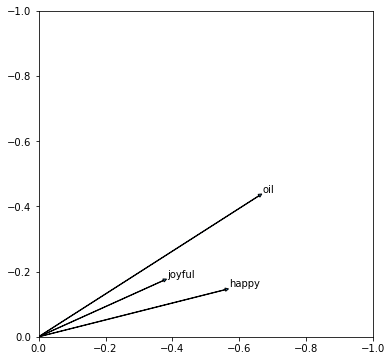

In [42]:
import matplotlib.pyplot as plt 

words2plot = ['happy', 'joyful', 'oil']

fig, ax = plt.subplots(figsize = (6, 6))

# plot an arrow for each word vector
for word in words2plot:
    # get word index from the dict
    word_idx = word2idx[word] 
    
    # plot the arrow starting from (0,0)
    ax.arrow(0, 0, words_embeddings_pca[word_idx,0], words_embeddings_pca[word_idx,1], head_width=0.01, head_length=0.01)

    # Add the word label 
    ax.annotate(word, (words_embeddings_pca[word_idx,0]-0.01, words_embeddings_pca[word_idx,1]-0.01))

# adjust the lims for two axes for visualization
ax.set_xlim(0, -1)
ax.set_ylim(0, -1)

plt.show()

## - t-SNE

t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between distributions on high-dimensional space and on low-dimensional space. The distributions are t-distributions that measure pairwise similarities between points. It is a very good visualization tool. 

If you are interested, you can read more on https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1 and also the original paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

In [44]:
from sklearn.manifold import TSNE

words_embeddings_tsne = TSNE(n_components=2, random_state=3).fit_transform(word_embeddings_array)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


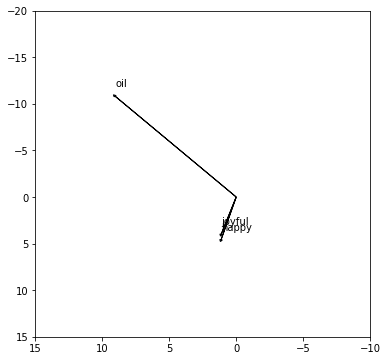

In [45]:
words2plot = ['happy', 'joyful', 'oil']

fig, ax = plt.subplots(figsize = (6, 6))

# plot an arrow for each word vector
for word in words2plot:
    word_idx = word2idx[word] # get word index from the dict
    
    # plot the arrow starting from (0,0)
    ax.arrow(0, 0, words_embeddings_tsne[word_idx,0], words_embeddings_tsne[word_idx,1], head_width=0.2, head_length=0.2)

    # Add the word label 
    ax.annotate(word, (words_embeddings_tsne[word_idx, 0], words_embeddings_tsne[word_idx, 1] - 1))
        
ax.set_xlim(15, -10)
ax.set_ylim(15, -20)

plt.show()

***

# GPU Computation (CUDA)

In [60]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0
